In [1]:
#Samarth Borade
#Roll No: C009
#BTI SEM 9
#Batch: B1
#Mini Proejct
#-------------------------imagin8-----------------------------------------------#

import pandas as pd
import numpy as np
import cv2
import matplotlib.pylab as plt
import cvzone


In [2]:
import cv2
import numpy as np

def load_and_resize(path, target_size=(512, 512)):
    img = cv2.imread(path)
    
    # Calculate the scaling factors for resizing
    height, width, _ = img.shape
    scale = min(target_size[0] / width, target_size[1] / height)
    
    # Use INTER_LINEAR interpolation for resizing
    img_resized = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
    
    # Calculate padding
    pad_x = (target_size[0] - img_resized.shape[1]) // 2
    pad_y = (target_size[1] - img_resized.shape[0]) // 2
    
    # Create a black canvas with the target size
    canvas = np.zeros((target_size[1], target_size[0], 3), dtype=np.uint8)
    
    # Paste the resized image onto the canvas
    canvas[pad_y:pad_y+img_resized.shape[0], pad_x:pad_x+img_resized.shape[1]] = img_resized
    
    return canvas


In [3]:
# Load an image
input_image = load_and_resize('../imagin8/input/sam.jpg')
check = load_and_resize('../imagin8/input/ryan.jpg')

In [4]:
def display(img):
    fig,ax = plt.subplots()
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.axis('off')
    plt.show()

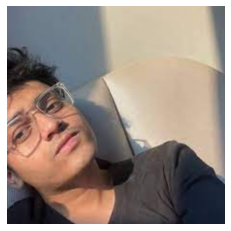

In [5]:
display(input_image)

In [6]:
def apply_filter(filter_function):
    cap = cv2.VideoCapture(0)

    while True:
        ret, frame = cap.read()

        if not ret:
            break

        output = filter_function(frame)
        # Display the result
        cv2.imshow('Filter Output', output)
        # Exit on 'q' press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()



# Vintage Sepia

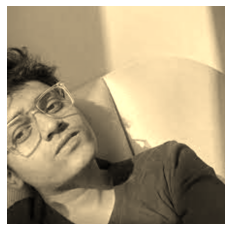

In [7]:
def apply_vintage_sepia(image):
    sepia_matrix = np.array([[0.272, 0.534, 0.131],
                             [0.349, 0.686, 0.168],
                             [0.393, 0.769, 0.189]])
    sepia_image = cv2.transform(image, sepia_matrix)
    return sepia_image


vintage_sepia = apply_vintage_sepia(input_image.copy())
display(vintage_sepia)

# Lomography

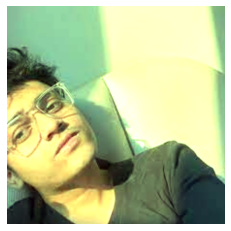

In [8]:
def apply_lomo(image):
    lomo_image = image.copy()

    # Increase green channel and decrease blue channel
    lomo_image[:, :, 1] = cv2.addWeighted(lomo_image[:, :, 1], 1.3, 0, 0, 0)  # Increase green
    lomo_image[:, :, 0] = cv2.addWeighted(lomo_image[:, :, 0], 0.9, 0, 0, 0)  # Decrease blue
    
    # Apply vignette
    rows, cols, _ = lomo_image.shape
    kernel_x = cv2.getGaussianKernel(cols, 400)  # Increased kernel size
    kernel_y = cv2.getGaussianKernel(rows, 400)  # Increased kernel size
    kernel = kernel_y * kernel_x.T
    mask = 255 * kernel / np.linalg.norm(kernel)
    mask = mask.astype(np.uint8)  # Convert mask to uint8
    lomo_image = cv2.addWeighted(lomo_image, 1.3, cv2.merge([mask, mask, mask]), -0.3, 0)
    
    return lomo_image


lomo = apply_lomo(input_image.copy())
display(lomo)

# Fish-eye Effect

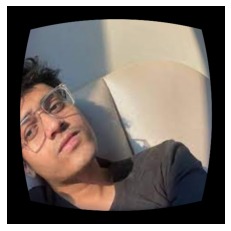

In [9]:

def apply_dynamic_fisheye(image):
    distortion_factor = 200 # Adjust this value for stronger/weaker distortion
    rows, cols = image.shape[:2]
    center_x, center_y = cols // 2, rows // 2
    map_x, map_y = np.meshgrid(np.arange(cols), np.arange(rows))
    
    map_x = (2 * (map_x - center_x) / cols).astype(np.float32)
    map_y = (2 * (map_y - center_y) / rows).astype(np.float32)
    
    r = np.sqrt(map_x**2 + map_y**2)
    k1 = distortion_factor * 0.0005
    k2 = distortion_factor * 0.0005
    map_x = (map_x * (1 + k1*r**2 + k2*r**4)).astype(np.float32)
    map_y = (map_y * (1 + k1*r**2 + k2*r**4)).astype(np.float32)
    
    map_x = ((map_x + 1) * cols / 2).astype(np.float32)
    map_y = ((map_y + 1) * rows / 2).astype(np.float32)
    
    distorted_image = cv2.remap(image, map_x, map_y, interpolation=cv2.INTER_LINEAR)

    return distorted_image


# Apply the dynamic fisheye effect with adjustable distortion factor
fisheye_result = apply_dynamic_fisheye(input_image.copy())

# Display the results
display(fisheye_result)


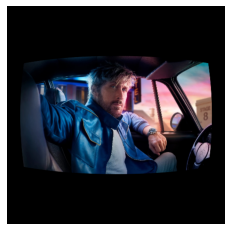

In [10]:
chc = apply_dynamic_fisheye(check.copy())

# Display the results
display(chc)

In [11]:
img= input_image.copy()
img1= input_image.copy()
img2= input_image.copy()
img3= input_image.copy()


# Kodak

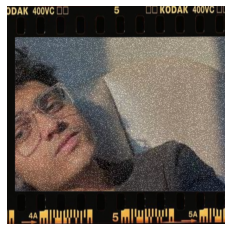

In [12]:
def apply_vintage_grains_effect3(input_image, overlay_path='../imagin8/filters/Films/kodak.png', resize_factor=(1, 1.5), exposure=0.7, noise_strength=0.3):
    try:
        # Generate random noise
        noise = np.random.normal(0, 1, input_image.shape[:2]).astype('uint8')
        noise = cv2.cvtColor(noise, cv2.COLOR_GRAY2BGR)
        
        # Resize the noise to match the dimensions of input_image
        noise = cv2.resize(noise, (input_image.shape[1], input_image.shape[0]))
        
        # Add the noise to the input image with adjusted exposure
        vintage_image = cv2.addWeighted(input_image, 1 - noise_strength, noise, noise_strength, 0)

        # Load and resize overlay image
        overlay = cv2.imread(overlay_path, cv2.IMREAD_UNCHANGED)
        overlay = cv2.resize(overlay, (0, 0), None, *resize_factor)

        # Overlay the images
        result = cvzone.overlayPNG(vintage_image, overlay, [-15, -60])

        return result
        
    except Exception as e:
        print(e)
        return None

# Assuming vintage_image1 is your original image
vintage_result = apply_vintage_grains_effect3(input_image)

display(vintage_result)


In [13]:
#apply_filter(apply_vintage_grains_effect3)

In [14]:
'''
def add_vintage_grains(input_image):
    try:
        # Generate random noise
        noise = np.random.normal(0, 1, input_image.shape[:2]).astype('uint8')
        noise = cv2.cvtColor(noise, cv2.COLOR_GRAY2BGR)
        
        # Resize the noise to match the dimensions of input_image
        noise = cv2.resize(noise, (input_image.shape[1], input_image.shape[0]))
        
        # Add the noise to the input image with adjusted exposure
        vintage_image = cv2.addWeighted(input_image, 0.7, noise, 0.3, 0)
        return vintage_image
        
    except Exception as e:
        print(e)
        return None


vintage_image1 = add_vintage_grains(input_image)




path ='../imagin8/filters/Films/kodak.png'
kodak = cv2.imread(path, cv2.IMREAD_UNCHANGED)
kodak = cv2.resize(kodak,(0,0),None,1,1.5)
overlay = cvzone.overlayPNG(vintage_image1,kodak,[-15,-60])
display(overlay)
'''

"\ndef add_vintage_grains(input_image):\n    try:\n        # Generate random noise\n        noise = np.random.normal(0, 1, input_image.shape[:2]).astype('uint8')\n        noise = cv2.cvtColor(noise, cv2.COLOR_GRAY2BGR)\n        \n        # Resize the noise to match the dimensions of input_image\n        noise = cv2.resize(noise, (input_image.shape[1], input_image.shape[0]))\n        \n        # Add the noise to the input image with adjusted exposure\n        vintage_image = cv2.addWeighted(input_image, 0.7, noise, 0.3, 0)\n        return vintage_image\n        \n    except Exception as e:\n        print(e)\n        return None\n\n\nvintage_image1 = add_vintage_grains(input_image)\n\n\n\n\npath ='../imagin8/filters/Films/kodak.png'\nkodak = cv2.imread(path, cv2.IMREAD_UNCHANGED)\nkodak = cv2.resize(kodak,(0,0),None,1,1.5)\noverlay = cvzone.overlayPNG(vintage_image1,kodak,[-15,-60])\ndisplay(overlay)\n"

# 18 mm 

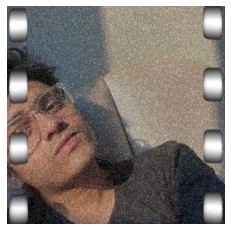

In [15]:
def apply_vintage_grains_effect2(input_image, overlay_path='../imagin8/filters/Films/new18.png', resize_factor=(0.8, 1.5), exposure=0.7, noise_strength=0.3):
    try:
        # Generate random noise
        noise = np.random.normal(0, 1, input_image.shape[:2]).astype('uint8')
        noise = cv2.cvtColor(noise, cv2.COLOR_GRAY2BGR)
        
        # Resize the noise to match the dimensions of input_image
        noise = cv2.resize(noise, (input_image.shape[1], input_image.shape[0]))
        
        # Add the noise to the input image with adjusted exposure
        vintage_image = cv2.addWeighted(input_image, 1 - noise_strength, noise, noise_strength, 0)

        # Load and resize overlay image
        overlay = cv2.imread(overlay_path, cv2.IMREAD_UNCHANGED)
        overlay = cv2.resize(overlay, (0, 0), None, *resize_factor)

        # Overlay the images
        result = cvzone.overlayPNG(vintage_image, overlay, [-10, 0])

        return result
        
    except Exception as e:
        print(e)
        return None

# Assuming img1 is your original image
vintage_result = apply_vintage_grains_effect2(img1)

display(vintage_result)


In [16]:
'''
def add_vintage_grains(input_image):
    try:
        # Generate random noise
        noise = np.random.normal(0, 1, input_image.shape[:2]).astype('uint8')
        noise = cv2.cvtColor(noise, cv2.COLOR_GRAY2BGR)
        
        # Resize the noise to match the dimensions of input_image
        noise = cv2.resize(noise, (input_image.shape[1], input_image.shape[0]))
        
        # Add the noise to the input image with adjusted exposure
        vintage_image = cv2.addWeighted(input_image, 0.7, noise, 0.3, 0)
        return vintage_image
        
    except Exception as e:
        print(e)
        return None


vintage_image = add_vintage_grains(img1)

path1 ='../imagin8/filters/Films/new18.png'
eight = cv2.imread(path1,cv2.IMREAD_UNCHANGED)
eight = cv2.resize(eight,(0,0),None,0.8,1.5)
overlay1 = cvzone.overlayPNG(vintage_image,eight,[-10,0])

display(overlay1)
'''


"\ndef add_vintage_grains(input_image):\n    try:\n        # Generate random noise\n        noise = np.random.normal(0, 1, input_image.shape[:2]).astype('uint8')\n        noise = cv2.cvtColor(noise, cv2.COLOR_GRAY2BGR)\n        \n        # Resize the noise to match the dimensions of input_image\n        noise = cv2.resize(noise, (input_image.shape[1], input_image.shape[0]))\n        \n        # Add the noise to the input image with adjusted exposure\n        vintage_image = cv2.addWeighted(input_image, 0.7, noise, 0.3, 0)\n        return vintage_image\n        \n    except Exception as e:\n        print(e)\n        return None\n\n\nvintage_image = add_vintage_grains(img1)\n\npath1 ='../imagin8/filters/Films/new18.png'\neight = cv2.imread(path1,cv2.IMREAD_UNCHANGED)\neight = cv2.resize(eight,(0,0),None,0.8,1.5)\noverlay1 = cvzone.overlayPNG(vintage_image,eight,[-10,0])\n\ndisplay(overlay1)\n"

In [17]:

'''
path1 ='../imagin8/filters/Films/new18.png'
eight = cv2.imread(path1,cv2.IMREAD_UNCHANGED)
eight = cv2.resize(eight,(0,0),None,0.8,1.5)
overlay1 = cvzone.overlayPNG(img1,eight,[-10,0])
eight.shape
#display(overlay1)
'''

"\npath1 ='../imagin8/filters/Films/new18.png'\neight = cv2.imread(path1,cv2.IMREAD_UNCHANGED)\neight = cv2.resize(eight,(0,0),None,0.8,1.5)\noverlay1 = cvzone.overlayPNG(img1,eight,[-10,0])\neight.shape\n#display(overlay1)\n"

# 16 mm

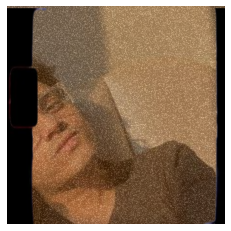

In [18]:
def apply_vintage_grains_effect(input_image, overlay_path='../imagin8/filters/Films/16mm.png', resize_factor=(1.09,1.88), exposure=0.7, noise_strength=0.3):
    try:
        # Generate an orange overlay with the same shape as input_image
        orange_overlay = np.full_like(input_image, [0, 128, 255], dtype=np.uint8)
        
        # Blend the orange overlay with the input image
        vintage_image = cv2.addWeighted(input_image, exposure, orange_overlay, 1 - exposure, 0)

        # Generate random noise
        noise = np.random.normal(0, 1, input_image.shape[:2]).astype('uint8')
        noise = cv2.cvtColor(noise, cv2.COLOR_GRAY2BGR)
        
        # Resize the noise to match the dimensions of input_image
        noise = cv2.resize(noise, (input_image.shape[1], input_image.shape[0]))
        
        # Add the noise to the input image with adjusted exposure
        vintage_image = cv2.addWeighted(vintage_image, 1 - noise_strength, noise, noise_strength, 0)
        
        # Load and resize overlay image
        overlay = cv2.imread(overlay_path, cv2.IMREAD_UNCHANGED)
        overlay = cv2.resize(overlay, (0, 0), None, *resize_factor)
        # Overlay the images
        result = cvzone.overlayPNG(vintage_image, overlay, [-10, 5])
        
        return result
        
    except Exception as e:
        print(e)
        return None

# Assuming img2 is your original image
vintage_result = apply_vintage_grains_effect(img2)

display(vintage_result)


In [19]:
'''
def add_vintage_grains(input_image):
    try:
        # Generate an orange overlay with the same shape as input_image
        orange_overlay = np.full_like(input_image, [0, 128, 255], dtype=np.uint8)
        
        # Blend the orange overlay with the input image
        vintage_image = cv2.addWeighted(input_image, 0.7, orange_overlay, 0.3, 0)
        
        return vintage_image
        
    except Exception as e:
        print(e)
        return None

temp = add_vintage_grains(img2)

def add_vintage_grains2(input_image):
    try:
        # Generate random noise
        noise = np.random.normal(0, 1, input_image.shape[:2]).astype('uint8')
        noise = cv2.cvtColor(noise, cv2.COLOR_GRAY2BGR)
        
        # Resize the noise to match the dimensions of input_image
        noise = cv2.resize(noise, (input_image.shape[1], input_image.shape[0]))
        
        # Add the noise to the input image with adjusted exposure
        vintage_image = cv2.addWeighted(input_image, 0.7, noise, 0.3, 0)
        return vintage_image
        
    except Exception as e:
        print(e)
        return None


vintage_image2 = add_vintage_grains2(temp)



path2 ='../imagin8/filters/Films/16mm.png'
six = cv2.imread(path2,cv2.IMREAD_UNCHANGED)
six = cv2.resize(six,(0,0),None,1.09,1.88)
overlay2 = cvzone.overlayPNG(vintage_image2,six,[-10,5])
display(overlay2)
'''

"\ndef add_vintage_grains(input_image):\n    try:\n        # Generate an orange overlay with the same shape as input_image\n        orange_overlay = np.full_like(input_image, [0, 128, 255], dtype=np.uint8)\n        \n        # Blend the orange overlay with the input image\n        vintage_image = cv2.addWeighted(input_image, 0.7, orange_overlay, 0.3, 0)\n        \n        return vintage_image\n        \n    except Exception as e:\n        print(e)\n        return None\n\ntemp = add_vintage_grains(img2)\n\ndef add_vintage_grains2(input_image):\n    try:\n        # Generate random noise\n        noise = np.random.normal(0, 1, input_image.shape[:2]).astype('uint8')\n        noise = cv2.cvtColor(noise, cv2.COLOR_GRAY2BGR)\n        \n        # Resize the noise to match the dimensions of input_image\n        noise = cv2.resize(noise, (input_image.shape[1], input_image.shape[0]))\n        \n        # Add the noise to the input image with adjusted exposure\n        vintage_image = cv2.addWeigh

# Poloroid

In [20]:
'''
def adjust_exposure_contrast(input_image, exposure=50, contrast=1.0):
    try:
        # Increase Exposure
        polaroid_image = cv2.convertScaleAbs(input_image, alpha=1, beta=exposure)

        # Adjust Contrast
        polaroid_image = cv2.convertScaleAbs(polaroid_image, alpha=contrast, beta=0)

        return polaroid_image

    except Exception as e:
        print(e)
        return None


# Assuming img3 is your original image
adjusted_image = adjust_exposure_contrast(input_image, exposure=90, contrast=0.7)

path3 ='../imagin8/filters/Films/poloroid.png'
polo = cv2.imread(path3,cv2.IMREAD_UNCHANGED)
polo = cv2.resize(polo,(0,0),None,1.4,1.2)
overlay3 = cvzone.overlayPNG(adjusted_image,polo,[-90,-30])
display(overlay3)
'''

"\ndef adjust_exposure_contrast(input_image, exposure=50, contrast=1.0):\n    try:\n        # Increase Exposure\n        polaroid_image = cv2.convertScaleAbs(input_image, alpha=1, beta=exposure)\n\n        # Adjust Contrast\n        polaroid_image = cv2.convertScaleAbs(polaroid_image, alpha=contrast, beta=0)\n\n        return polaroid_image\n\n    except Exception as e:\n        print(e)\n        return None\n\n\n# Assuming img3 is your original image\nadjusted_image = adjust_exposure_contrast(input_image, exposure=90, contrast=0.7)\n\npath3 ='../imagin8/filters/Films/poloroid.png'\npolo = cv2.imread(path3,cv2.IMREAD_UNCHANGED)\npolo = cv2.resize(polo,(0,0),None,1.4,1.2)\noverlay3 = cvzone.overlayPNG(adjusted_image,polo,[-90,-30])\ndisplay(overlay3)\n"

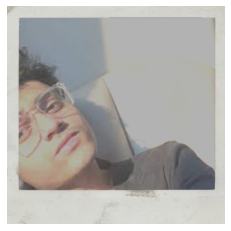

In [21]:

def apply_polaroid_effect(input_image, exposure=90, contrast=0.7):
    try:
        polaroid_image = cv2.convertScaleAbs(input_image, alpha=1, beta=exposure)
        polaroid_image = cv2.convertScaleAbs(polaroid_image, alpha=contrast, beta=0)
        # Assuming path3 is the polaroid overlay
        path3 ='../imagin8/filters/Films/poloroid.png'
        polo = cv2.imread(path3, cv2.IMREAD_UNCHANGED)
        polo = cv2.resize(polo,(0,0),None,1.4,1.2)

        overlay = cvzone.overlayPNG(polaroid_image, polo, [-90, -30])
        return overlay

    except Exception as e:
        print(e)
        return None



polaroid_result = apply_polaroid_effect(img3)
# Display the polaroid_result
display(polaroid_result)


In [22]:
'''
def adjust_exposure_contrast(input_image, exposure=50, contrast=1.0):
    try:
        polaroid_image = cv2.convertScaleAbs(input_image, alpha=1, beta=exposure)
        polaroid_image = cv2.convertScaleAbs(polaroid_image, alpha=contrast, beta=0)

        return polaroid_image

    except Exception as e:
        print(e)
        return None

def apply_polaroid_effect(input_image, exposure=90, contrast=0.7):
    try:
        # Adjust exposure and contrast
        adjusted_image = adjust_exposure_contrast(input_image, exposure, contrast)
        print("Shape of adjusted_image:", adjusted_image.shape)  # Debug print

        # Assuming path3 is the polaroid overlay
        path3 ='../imagin8/filters/Films/poloroid.png'
        polo = cv2.imread(path3, cv2.IMREAD_UNCHANGED)
        polo = cv2.resize(polo,(0,0),None,1.4,1.2)

        overlay = cvzone.overlayPNG(adjusted_image, polo, [-90, -30])

        return overlay

    except Exception as e:
        print(e)
        return None


polaroid_result = apply_polaroid_effect(img3)
# Display the polaroid_result
display(polaroid_result)
'''

'\ndef adjust_exposure_contrast(input_image, exposure=50, contrast=1.0):\n    try:\n        polaroid_image = cv2.convertScaleAbs(input_image, alpha=1, beta=exposure)\n        polaroid_image = cv2.convertScaleAbs(polaroid_image, alpha=contrast, beta=0)\n\n        return polaroid_image\n\n    except Exception as e:\n        print(e)\n        return None\n\ndef apply_polaroid_effect(input_image, exposure=90, contrast=0.7):\n    try:\n        # Adjust exposure and contrast\n        adjusted_image = adjust_exposure_contrast(input_image, exposure, contrast)\n        print("Shape of adjusted_image:", adjusted_image.shape)  # Debug print\n\n        # Assuming path3 is the polaroid overlay\n        path3 =\'../imagin8/filters/Films/poloroid.png\'\n        polo = cv2.imread(path3, cv2.IMREAD_UNCHANGED)\n        polo = cv2.resize(polo,(0,0),None,1.4,1.2)\n\n        overlay = cvzone.overlayPNG(adjusted_image, polo, [-90, -30])\n\n        return overlay\n\n    except Exception as e:\n        print(

# Filter 1 

In [23]:
f1 = img.copy()
f2 = img.copy()
f3 = img.copy()
f4 = img.copy()

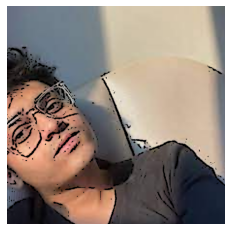

In [24]:
from PIL import Image


def cartoon_filter(input_image):
    try:
        img = cv2.cvtColor(np.asarray(input_image), cv2.COLOR_RGB2BGR)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray = cv2.medianBlur(gray, 1)
        edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
        color = cv2.bilateralFilter(img, 5, -1000, -1000)
        cartoon = cv2.bitwise_and(color, color, mask=edges)
        
        return cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)
        
    except Exception as e:
        print(e)
        return None

cartoon_image = cartoon_filter(f1)

# Display the cartoon image
if cartoon_image is not None:
    display(cartoon_image)


# Sketch 

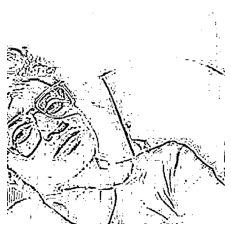

In [25]:
def sketch_filter(input_image):
    try:
        img = cv2.cvtColor(np.asarray(input_image), cv2.COLOR_RGB2BGR)
        output = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        output = cv2.GaussianBlur(output, (3, 3), 0)
        output = cv2.Laplacian(output, -1, ksize=5)
        output = 255 - output
        ret, output = cv2.threshold(output, 150, 255, cv2.THRESH_BINARY)
        
        sketch_image = Image.fromarray(output)
        sketch_image_rgb = cv2.cvtColor(np.array(sketch_image), cv2.COLOR_BGR2RGB)
        
        return sketch_image_rgb
        
    except Exception as e:
        print(e)
        return None

sketch_image = sketch_filter(f2)

# Display the sketch image
if sketch_image is not None:
    display(sketch_image)


# Grains

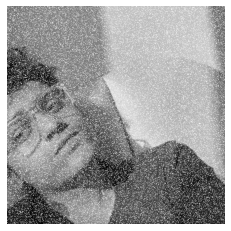

In [26]:
def add_vintage_grains(input_image):
    try:
        # Convert to grayscale for simplicity
        img = cv2.cvtColor(np.asarray(input_image), cv2.COLOR_RGB2GRAY)
        #img = input_image.copy()
        noise = np.random.normal(0, 1, img.shape).astype('uint8')
        vintage_image = cv2.add(img, noise)
     
        return vintage_image
        
    except Exception as e:
        print(e)
        return None
vintage_image = add_vintage_grains(f3)

# Display the vintage image
if vintage_image is not None:
    display(vintage_image)


In [27]:
'''
def add_vintage_grains(input_image):
    try:
        # Convert to grayscale for simplicity
        img = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
        noise = np.random.normal(0, 1, img.shape).astype('uint8')
        vintage_image = cv2.add(img, noise)
        return cv2.cvtColor(vintage_image, cv2.COLOR_GRAY2RGB)
        
    except Exception as e:
        print(e)
        return None

# Initialize video capture
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    # Apply vintage grains filter
    vintage_frame = add_vintage_grains(frame)

    # Display the result
    cv2.imshow('Vintage Grains Filter', vintage_frame)

    # Exit on 'q' press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the video capture and close all windows
cap.release()
cv2.destroyAllWindows()
'''


"\ndef add_vintage_grains(input_image):\n    try:\n        # Convert to grayscale for simplicity\n        img = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)\n        noise = np.random.normal(0, 1, img.shape).astype('uint8')\n        vintage_image = cv2.add(img, noise)\n        return cv2.cvtColor(vintage_image, cv2.COLOR_GRAY2RGB)\n        \n    except Exception as e:\n        print(e)\n        return None\n\n# Initialize video capture\ncap = cv2.VideoCapture(0)\n\nwhile True:\n    ret, frame = cap.read()\n    \n    if not ret:\n        break\n\n    # Apply vintage grains filter\n    vintage_frame = add_vintage_grains(frame)\n\n    # Display the result\n    cv2.imshow('Vintage Grains Filter', vintage_frame)\n\n    # Exit on 'q' press\n    if cv2.waitKey(1) & 0xFF == ord('q'):\n        break\n\n# Release the video capture and close all windows\ncap.release()\ncv2.destroyAllWindows()\n"

In [28]:
'''
def sketch_filter(input_image):
    try:
        img = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
        output = cv2.GaussianBlur(img, (3, 3), 0)
        output = cv2.Laplacian(output, -1, ksize=5)
        output = 255 - output
        ret, output = cv2.threshold(output, 150, 255, cv2.THRESH_BINARY)
        return output  # Return the processed image
    except Exception as e:
        print(e)
        return None


# Initialize video capture
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    Skt = sketch_filter(frame)

    # Display the result
    cv2.imshow('Sketch', Skt)

    # Exit on 'q' press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
'''


"\ndef sketch_filter(input_image):\n    try:\n        img = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)\n        output = cv2.GaussianBlur(img, (3, 3), 0)\n        output = cv2.Laplacian(output, -1, ksize=5)\n        output = 255 - output\n        ret, output = cv2.threshold(output, 150, 255, cv2.THRESH_BINARY)\n        return output  # Return the processed image\n    except Exception as e:\n        print(e)\n        return None\n\n\n# Initialize video capture\ncap = cv2.VideoCapture(0)\n\nwhile True:\n    ret, frame = cap.read()\n    \n    if not ret:\n        break\n\n    Skt = sketch_filter(frame)\n\n    # Display the result\n    cv2.imshow('Sketch', Skt)\n\n    # Exit on 'q' press\n    if cv2.waitKey(1) & 0xFF == ord('q'):\n        break\n\ncap.release()\ncv2.destroyAllWindows()\n"

In [29]:
#apply_filter(cartoon_filter)

In [30]:
import tkinter as tk
from tkinter import filedialog
from PIL import ImageTk, Image

# Create the main application window
root = tk.Tk()
root.title("imagin8")

# Function to open a file dialog and load an image
def load_and_resize():
    global img_path, img_display
    img_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.png;*.jpg;*.jpeg;*.gif")])
    img = cv2.imread(img_path)
    
    # Calculate the scaling factors for resizing
    height, width, _ = img.shape
    scale = min(512 / width, 512 / height)
    
    # Use INTER_LINEAR interpolation for resizing
    img_resized = cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
    
    # Calculate padding
    pad_x = (512 - img_resized.shape[1]) // 2
    pad_y = (512 - img_resized.shape[0]) // 2
    
    # Create a black canvas with the target size
    canvas = np.zeros((512, 512, 3), dtype=np.uint8)
    
    # Paste the resized image onto the canvas
    canvas[pad_y:pad_y+img_resized.shape[0], pad_x:pad_x+img_resized.shape[1]] = img_resized
    
    img_display = ImageTk.PhotoImage(Image.fromarray(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB)))
    panel = tk.Label(root, image=img_display)
    panel.grid(row=1, column=1)


# Function to apply a filter to the loaded image
def apply_filter(filter_func):
    global img_display
    if img_path is not None:
        img = Image.open(img_path)
        img = img.resize((300, 300), Image.ANTIALIAS)
        img = ImageTk.PhotoImage(img)
        filtered_img = filter_func(img)
        img_display = ImageTk.PhotoImage(filtered_img)
        panel = tk.Label(root, image=img_display)
        panel.grid(row=1, column=1)



def apply_live(filter_function):
    global img_display
    
    cap = cv2.VideoCapture(0)
    
    while True:
        ret, frame = cap.read()
        
        if not ret:
            break
        
        # Apply the filter function
        output = filter_function(frame)
        
        # Display the result
        img_display = ImageTk.PhotoImage(Image.fromarray(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)))
        panel = tk.Label(root, image=img_display)
        panel.grid(row=1, column=1)
        
        # Exit on 'q' press
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()




# Create buttons and arrange them
button1 = tk.Button(root, text="Load Image", command=load_and_resize)
button1.grid(row=0, column=0)

button2 = tk.Button(root, text="Apply Filter 1", command=lambda: apply_filter(apply_vintage_sepia))
button2.grid(row=0, column=1)

button3 = tk.Button(root, text="Apply Filter 2", command=lambda: apply_filter(apply_vintage_grains_effect2))
button3.grid(row=0, column=2)

button4 = tk.Button(root, text="Live Mode", command=lambda: apply_live(add_vintage_grains))
button4.grid(row=0, column=3)

# Initialize variables
img_path = None
img_display = None

# Start the main event loop
root.mainloop()
